- This notebook generate the gene expression spatial map using color scheme that mimics insitu hybridization images. 

In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import anndata
import pandas as pd

### 1. Prepare data

- Load the adata for the anterior and posterior MERFISH sections

In [ ]:
%%time

# load 1311 posterior 
Donor_1311_posterior_adata  = anndata.read_h5ad(r'./../../MERFISH_adata_QC/mapmycell_annotated_adata/MER2_Gpe_Gpi_CaPu_1311__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./../../spatialDomain_analysis/processed_data/donor_1311_PosteriorMERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_1311_posterior_adata.obs = Donor_1311_posterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_GrayMatter_subclustered']])
Donor_1311_posterior_adata.obs = Donor_1311_posterior_adata.obs.rename(columns = {'spatialmodule_GrayMatter_subclustered':'Final_spatialModules'})

print('load 1311 posterior .....')


# # load 2427 posterior 
Donor_2427_posterior_adata = anndata.read_h5ad(r'./../../MERFISH_adata_QC/mapmycell_annotated_adata/MER4_Gpe_Gpi_2724__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./../../spatialDomain_analysis/processed_data/donor_2724_PosteriorMERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_2427_posterior_adata.obs = Donor_2427_posterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_GrayMatter_subclustered']])
Donor_2427_posterior_adata.obs = Donor_2427_posterior_adata.obs.rename(columns = {'spatialmodule_GrayMatter_subclustered':'Final_spatialModules'})
print('load 2427 posterior .....')


# # load 2427 anterior 
Donor_2427_anterior_adata = anndata.read_h5ad(r'./../../MERFISH_adata_QC/mapmycell_annotated_adata/MER1_CaPuNAC_2427__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./../../spatialDomain_analysis/processed_data/chip5_AnteriorMERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_2427_anterior_adata.obs = Donor_2427_anterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_STRd_subclustered']])
Donor_2427_anterior_adata.obs = Donor_2427_anterior_adata.obs.rename(columns = {'spatialmodule_STRd_subclustered':'Final_spatialModules'})
print('load 2427 anterior .....')


# # load 3924 anterior 
Donor_3924_anterior_adata = anndata.read_h5ad(r'./../../MERFISH_adata_QC/mapmycell_annotated_adata/MER5_CaPuNAc_3924__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./../../spatialDomain_analysis/processed_data/donor_3924_AnteriorMERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_3924_anterior_adata.obs = Donor_3924_anterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_STRd_subclustered']])
Donor_3924_anterior_adata.obs = Donor_3924_anterior_adata.obs.rename(columns = {'spatialmodule_STRd_subclustered':'Final_spatialModules'})
print('load 3924 anterior  .....')

load 1311 posterior .....
load 2427 posterior .....
load 2427 anterior .....
load 3924 anterior  .....
CPU times: user 1min 29s, sys: 16.9 s, total: 1min 46s
Wall time: 1min 49s


- concatenate the anndata

- Make sure teh same order of genes is used in all samples and replace count with raw counts.

In [4]:
# make sure the same order of genes is used in all samples  and replace count with raw counts
common_gns = np.array(Donor_2427_posterior_adata.var_names)
Donor_1311_posterior_adata.X = Donor_1311_posterior_adata.layers['X_raw']
Donor_1311_posterior_adata = Donor_1311_posterior_adata[:,common_gns].copy()
Donor_1311_posterior_adata.obsm['X_spatial'] = Donor_1311_posterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_1311_posterior_adata.obsm else Donor_1311_posterior_adata.obsm['X_spatial']

Donor_2427_posterior_adata.X = Donor_2427_posterior_adata.layers['X_raw']
Donor_2427_posterior_adata = Donor_2427_posterior_adata[:,common_gns].copy()
Donor_2427_posterior_adata.obsm['X_spatial'] = Donor_2427_posterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_2427_posterior_adata.obsm else Donor_2427_posterior_adata.obsm['X_spatial']

Donor_2427_anterior_adata.X = Donor_2427_anterior_adata.obsm['X_raw']
Donor_2427_anterior_adata = Donor_2427_anterior_adata[:,common_gns].copy()
Donor_2427_anterior_adata.obsm['X_spatial'] = Donor_2427_anterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_2427_anterior_adata.obsm else Donor_2427_anterior_adata.obsm['X_spatial']

Donor_3924_anterior_adata.X = Donor_3924_anterior_adata.layers['X_raw']
Donor_3924_anterior_adata = Donor_3924_anterior_adata[:,common_gns].copy()
Donor_3924_anterior_adata.obsm['X_spatial'] = Donor_3924_anterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_3924_anterior_adata.obsm else Donor_3924_anterior_adata.obsm['X_spatial']

In [5]:
# concatenate the data
adata = anndata.concat([Donor_1311_posterior_adata,Donor_2427_posterior_adata,Donor_2427_anterior_adata,Donor_3924_anterior_adata],
                       label = 'samples',
                        keys= ['Donor_1311_posterior','Donor_2427_posterior','Donor_2427_anterior','Donor_3924_anterior'],
                        fill_value=0,
                        join='outer',
                        merge='same' ,
                        index_unique='_' # make the cell index unique
                        ) 


In [6]:
# backup the raw count.
adata.layers['X_raw'] = adata.X.copy()

- Normalize the expression matrix 

1. Normalize the expression matrix by volume 

In [7]:
med_volm = np.median(adata.obs['volm'])
temp = adata.X.astype('float').copy()
temp /= adata.obs['volm'].values[:,np.newaxis]
temp *= med_volm
adata.X = temp


2. Normalize the expression matrix by count

In [8]:
import scanpy as sc
target_sum = np.median(np.array(adata.X.sum(axis=-1)))
sc.pp.normalize_total(adata, target_sum = target_sum)
sc.pp.log1p(adata)

- Prepare the spatial plot for marker genes 

In [9]:
def rotate(spatial_x,deg):
    """
    spatial_X: Nx2 matrix
    deg: rotation degree in radian
    
    """
    deg = np.deg2rad(deg)
    rotation_mat = np.array([[np.cos(deg),-1*np.sin(deg)],
                            [np.sin(deg),np.cos(deg)]])
    return np.matmul(spatial_x,rotation_mat)

In [10]:
import seaborn as sns
import matplotlib.patches as patches
import os
import seaborn as sns
import matplotlib.patches as patches
import matplotlib as mpl
import os

rot_deg = {'Donor_1311_posterior':0, 'Donor_2427_anterior':-45,'Donor_2427_posterior':0,'Donor_3924_anterior':45} # rotation value for each sample 
reverse_coord = {'Donor_1311_posterior':False,'Donor_2427_anterior':True, 'Donor_2427_posterior':False,'Donor_3924_anterior':True }
invert_xaxis = {'Donor_1311_posterior':False,'Donor_2427_anterior':True,'Donor_2427_posterior':False,'Donor_3924_anterior':False }
invert_yaxis = {'Donor_1311_posterior':True,'Donor_2427_anterior':True,'Donor_2427_posterior':True,'Donor_3924_anterior':True}
backgd_sz = {'Donor_1311_posterior':0.025,'Donor_2427_anterior':0.05,'Donor_2427_posterior':0.03,'Donor_3924_anterior':0.05}

samples= np.unique(adata.obs['samples'])
subadata_dic = {}
for i,sample in enumerate(samples):
    cond = adata.obs['samples'] == sample
    subadata_dic[sample] = adata[cond].copy()
adata.obs[['x','y']] = adata.obsm['X_spatial'].copy()
figsize_scale = 8e3

dx_list = []
dy_list = []
samples = np.unique(adata.obs['samples'])
for i,sample in enumerate(samples):
    cond = adata.obs['samples'] == sample
    # adjucent the spatial coordinate 
    X_sample = adata[cond].obsm['X_spatial'].copy()
    X_sample = rotate(X_sample,rot_deg[sample]) # since rotation is could change the xy limit, perform rotation to get accurate estiamte

    # idenity the proprotion betwen the width and height of the sample
    dx,dy = np.abs(np.ptp(X_sample, axis = 0))
    dx_list += [dx/figsize_scale]
    dy_list += [dy/figsize_scale]
dx_max = np.max(dx_list)  
dy_max = np.max(dy_list)  
print(f'max-width:{dx_max}, max-height:{dy_max}')

max-width:3.4967735624804646, max-height:4.602798834741115


In [12]:
genes = [gn for gn in adata.var_names if 'blank' not in gn.lower()]
len(genes)

673

In [13]:
def getGeneExpression(adata,gn):
    keep = adata.var_names == gn
    exp = np.array(adata[:,keep].X)
    M = np.percentile(exp,99)
    m = np.percentile(exp,1)
    expN = (exp - m)/(M-m)
    return expN

In [ ]:
# define canvas for each samples, figure size will be based on the proprotion of the actual tissue size.

szmax = 0.5
szmin = 0.05

for gn in  genes:#all_clusters:

    fig = plt.figure(dpi = 300, figsize = (dx_max,dy_max))
    bbox = fig.get_tightbbox()
    ax = None

    samples = ['Donor_3924_anterior','Donor_2427_anterior','Donor_2427_posterior','Donor_1311_posterior']
    for i,sample in enumerate(samples):
        subadata = subadata_dic[sample]
        # adjucent the spatial coordinate 
        X_sample = subadata.obsm['X_spatial'].copy()
        X_sample = rotate(X_sample,rot_deg[sample])

        if reverse_coord[sample]:
            X_sample = X_sample[:,::-1]
        
        subadata.obs.loc[:,['x','y']] = X_sample.copy()
        # idenity the proprotion betwen the width and height of the sample
        dx,dy = np.abs(np.ptp(X_sample, axis = 0))
        if ax != None:
            bbox = ax.get_position()
        dx = dx/figsize_scale
        dy = dy/figsize_scale
        # calculate fraction of the new x and y size as fraction of the previous axis x and y size. we are doing this because, fig.add_axes accept values as fraction of the figure width and hight, 
        dx_frac = dx/fig.get_figwidth()
        dy_frac = dy/fig.get_figheight()
        width_gap = 1
        if i < 2:
            width_gap = 0.8
        elif i < 3:
            width_gap = 0.9
        ax = fig.add_axes([bbox.xmin + width_gap*bbox.width,bbox.ymin,dx_frac, dy_frac], adjustable = 'box')
        expN = getGeneExpression(subadata,gn)
        expN_ = np.clip(expN,0,1)
        sz = szmin + expN_*(szmax - szmin)
        cmap = mpl.cm.Greys(expN_)
        sns.scatterplot(x = X_sample[:,0], y = X_sample[:,1], s = 0.03, c = 'pink', ax = ax) # background / tissue structure
        sns.scatterplot(x = X_sample[:,0], y = X_sample[:,1], s = sz.ravel(), c = cmap, ax = ax) # expression map of gene 
        # ax.scatter(X_sample[:,0],X_sample[:,1], s = sz.ravel(), c = 'gray')

        # Set the axis limits 
        xmax, ymax = X_sample.max(axis=0)
        xmin, ymin = X_sample.min(axis=0)
        # ax.set_xlim([xmin,xmax])
        ax.set_ylim([ymin,ymax + 3500])
        # add scale bar
        scalebar = patches.Rectangle([xmin + 500,1*ymax + 3000],10000,200,color = 'k')
        ax.add_patch(scalebar)

        if invert_xaxis[sample]:
            ax.invert_xaxis()
        
        if invert_yaxis[sample]:
            ax.invert_yaxis()
        ax.set_axis_off()
        # ax.set_aspect('equal', adjustable ='datalim')
        if i == 1:
            # ax.text(xmin + 0.7*np.ptp(X_sample[:,0]), ymin - 0.2*np.ptp(X_sample[:,1]), f'{cluster_}', fontsize = 25)
            ax.text(xmin + 0.5*np.ptp(X_sample[:,0]), ymin - 0.2*np.ptp(X_sample[:,1]), f'{gn}', fontsize = 30)

    plt.savefig(r'./figures/Figure3/supplemental/Gene_expression_spatialMap' + os.sep + f'{gn}_expression_map' + '.png',bbox_inches = 'tight')
    plt.savefig(r'./figures/Figure3/supplemental/Gene_expression_spatialMap' + os.sep + f'{gn}_expression_map' + '.tif',bbox_inches = 'tight')
    plt.show()
    plt.close() # remove the figure to save space(memmory). 

- GP specific marker genes

In [32]:
genes = ['RAB3B','BAIAP3']
genes = ['PVALB']

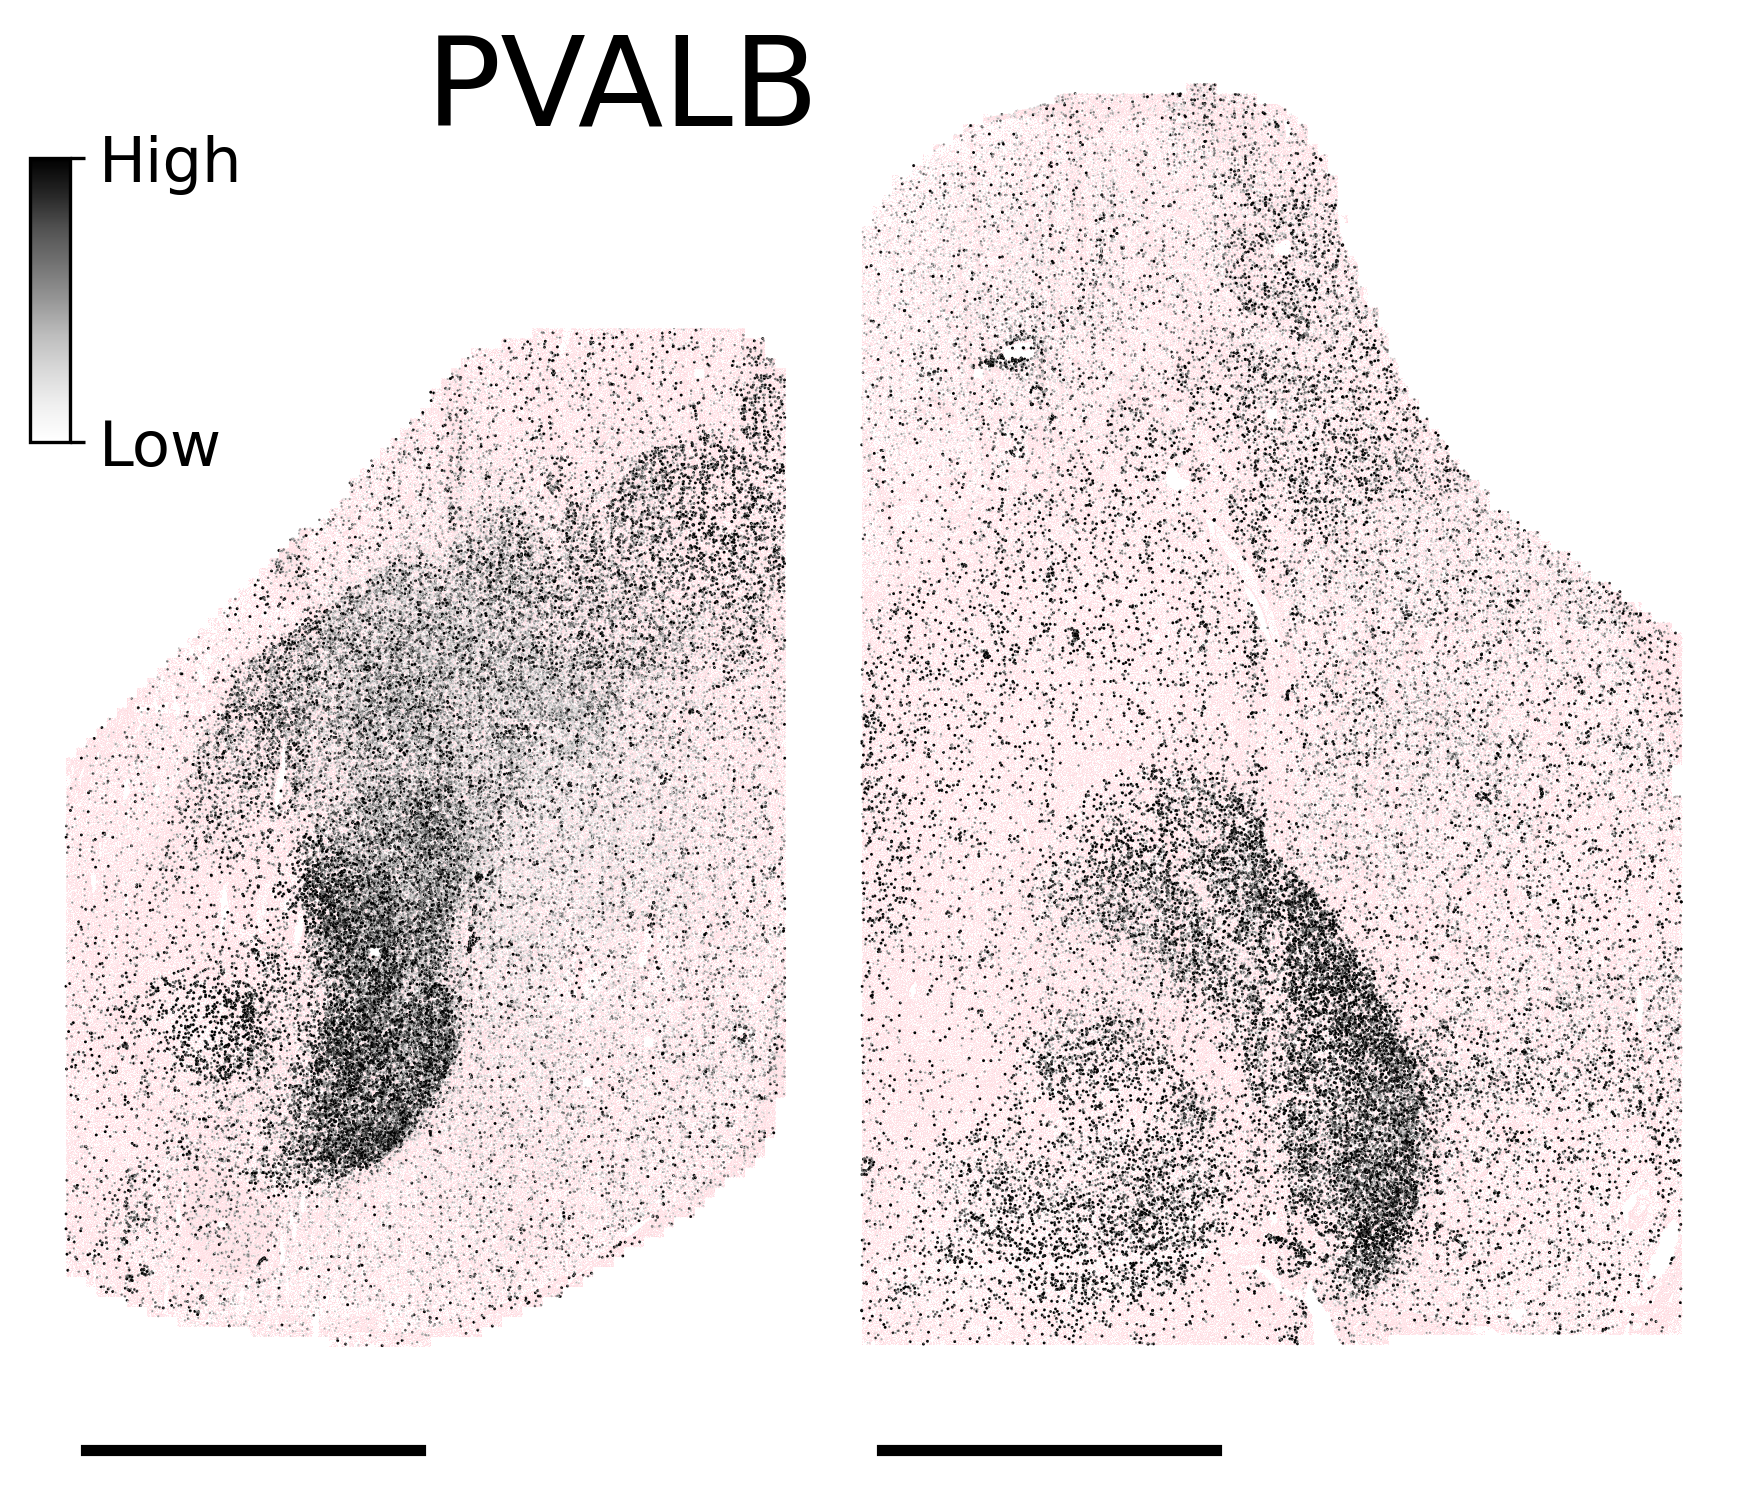

In [33]:
# define canvas for each samples, figure size will be based on the proprotion of the actual tissue size.

szmax = 0.5
szmin = 0.01

for gn in  genes:#all_clusters:

    fig = plt.figure(dpi = 300, figsize = (dx_max,dy_max))
    bbox = fig.get_tightbbox()
    ax = None

    samples = ['Donor_2427_posterior','Donor_1311_posterior']
    for i,sample in enumerate(samples):
        subadata = subadata_dic[sample]
        # adjucent the spatial coordinate 
        X_sample = subadata.obsm['X_spatial'].copy()
        X_sample = rotate(X_sample,rot_deg[sample])

        if reverse_coord[sample]:
            X_sample = X_sample[:,::-1]
        
        subadata.obs.loc[:,['x','y']] = X_sample.copy()
        # idenity the proprotion betwen the width and height of the sample
        dx,dy = np.abs(np.ptp(X_sample, axis = 0))
        if ax != None:
            bbox = ax.get_position()
        dx = dx/figsize_scale
        dy = dy/figsize_scale
        # calculate fraction of the new x and y size as fraction of the previous axis x and y size. we are doing this because, fig.add_axes accept values as fraction of the figure width and hight, 
        dx_frac = dx/fig.get_figwidth()
        dy_frac = dy/fig.get_figheight()
        width_gap = 1
        # if i < 2:
        #     width_gap = 0.8
        # elif i < 3:
        #     width_gap = 0.9
        ax = fig.add_axes([bbox.xmin + width_gap*bbox.width,bbox.ymin,dx_frac, dy_frac], adjustable = 'box')
        expN = getGeneExpression(subadata,gn)
        expN_ = np.clip(expN,0,1)
        sz = szmin + expN_*(szmax - szmin)
        cmap = mpl.cm.Greys(expN_)
        sns.scatterplot(x = X_sample[:,0], y = X_sample[:,1], s = 0.03, c = 'pink', ax = ax) # background / tissue structure
        sns.scatterplot(x = X_sample[:,0], y = X_sample[:,1], s = sz.ravel(), c = cmap, ax = ax) # expression map of gene 
        # ax.scatter(X_sample[:,0],X_sample[:,1], s = sz.ravel(), c = 'gray')

        # Set the axis limits 
        xmax, ymax = X_sample.max(axis=0)
        xmin, ymin = X_sample.min(axis=0)
        # ax.set_xlim([xmin,xmax])
        ax.set_ylim([ymin,ymax + 3500])
        # add scale bar
        scalebar = patches.Rectangle([xmin + 500,1*ymax + 3000],10000,200,color = 'k')
        ax.add_patch(scalebar)

        if invert_xaxis[sample]:
            ax.invert_xaxis()
        
        if invert_yaxis[sample]:
            ax.invert_yaxis()
        ax.set_axis_off()
        # ax.set_aspect('equal', adjustable ='datalim')
        if i == 0:
            # ax.text(xmin + 0.7*np.ptp(X_sample[:,0]), ymin - 0.2*np.ptp(X_sample[:,1]), f'{cluster_}', fontsize = 25)
            ax.text(xmin + 0.5*np.ptp(X_sample[:,0]), ymin - 0.2*np.ptp(X_sample[:,1]), f'{gn}', fontsize = 30)

            # add axes for the colorbar 
            bbox = ax.get_position()
            ax_cbar = fig.add_axes([bbox.xmin, bbox.ymin + 0.9*bbox.height, 0.05*bbox.width,0.25*bbox.height])
            norm = mpl.colors.Normalize(vmin=0, vmax=1)
            fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Greys'), cax=ax_cbar,)
            ax_cbar.set_yticks([1,0],labels = ['High','Low'],fontsize = 15)

    plt.savefig(r'/mnt/Z/Lab/Bereket_public/Human_basal_ganglion_project/FigureMaking_notebooks/figures/GP_MainFigure/GP_Gene_expression_spatialMap' + os.sep + f'{gn}_expression_map' + '.png',bbox_inches = 'tight')
    plt.savefig(r'/mnt/Z/Lab/Bereket_public/Human_basal_ganglion_project/FigureMaking_notebooks/figures/GP_MainFigure/GP_Gene_expression_spatialMap' + os.sep + f'{gn}_expression_map' + '.tif',bbox_inches = 'tight')
    plt.show()
    plt.close() # remove the figure to save space(memmory). 